In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('C:/Users/DELL NOTEBOOK/Downloads/world_bank_dataset.csv')
print(df.shape)

(200, 8)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country                                 200 non-null    object 
 1   Year                                    200 non-null    int64  
 2   GDP (USD)                               200 non-null    float64
 3   Population                              200 non-null    float64
 4   Life Expectancy                         200 non-null    float64
 5   Unemployment Rate (%)                   200 non-null    float64
 6   CO2 Emissions (metric tons per capita)  200 non-null    float64
 7   Access to Electricity (%)               200 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 12.6+ KB


In [4]:
pd.isnull(df)

,Country,Year,GDP (USD),Population,Life Expectancy,Unemployment Rate (%),CO2 Emissions (metric tons per capita),Access to Electricity (%)
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
195,False,False,False,False,False,False,False,False
196,False,False,False,False,False,False,False,False
197,False,False,False,False,False,False,False,False
198,False,False,False,False,False,False,False,False


In [5]:
print(pd.isnull(df).sum())

Country                                   0
Year                                      0
GDP (USD)                                 0
Population                                0
Life Expectancy                           0
Unemployment Rate (%)                     0
CO2 Emissions (metric tons per capita)    0
Access to Electricity (%)                 0
dtype: int64


In [6]:
row_count, column_count = df.shape
print(f"Rows: {row_count}, Columns: {column_count}.")

missing_values = df.isnull().sum().sum()
if missing_values > 0:
    print("There are",missing_values,"missing values in the dataframe.")
else:
    print("There are no missing values in the dataframe.")


duplicate_values = df.duplicated().sum()
if duplicate_values > 0:
    print("There are",duplicate_values,"duplicate values in the dataframe.")
else:
    print("There are no duplicate values in the dataframe.")

Rows: 200, Columns: 8.
There are no missing values in the dataframe.
There are no duplicate values in the dataframe.


In [7]:
df.describe()

,Year,GDP (USD),Population,Life Expectancy,Unemployment Rate (%),CO2 Emissions (metric tons per capita),Access to Electricity (%)
count,200.000000,2.000000e+02,2.000000e+02,200.000000,200.000000,200.000000,200.000000
mean,2014.500000,1.056867e+13,7.387908e+08,66.324500,13.271650,10.058200,72.876750
std,2.879489,5.547703e+12,4.389956e+08,9.818859,6.804166,5.712125,14.791291
min,2010.000000,1.011720e+12,9.970000e+06,50.500000,2.270000,0.810000,50.120000
25%,2012.000000,5.774120e+12,3.533775e+08,57.775000,6.810000,4.882500,60.315000
50%,2014.500000,1.050615e+13,7.216700e+08,64.900000,13.470000,9.745000,70.280000
75%,2017.000000,1.503451e+13,1.090860e+09,74.500000,18.542500,15.622500,86.297500
max,2019.000000,1.998377e+13,1.498060e+09,84.900000,24.790000,19.840000,99.760000


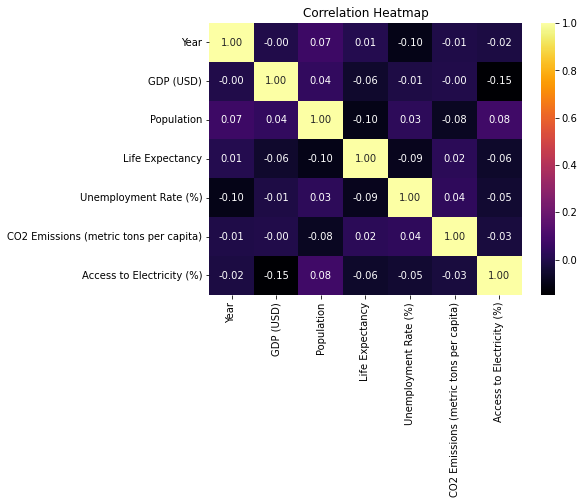

In [8]:
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(7, 5))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='inferno')
plt.title('Correlation Heatmap')
plt.show()

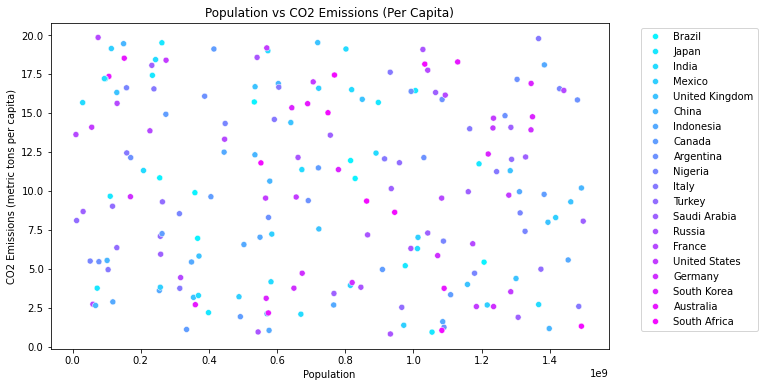

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Population', y='CO2 Emissions (metric tons per capita)', hue='Country', palette='cool')
plt.title("Population vs CO2 Emissions (Per Capita)")
plt.xlabel("Population")
plt.ylabel("CO2 Emissions (metric tons per capita)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

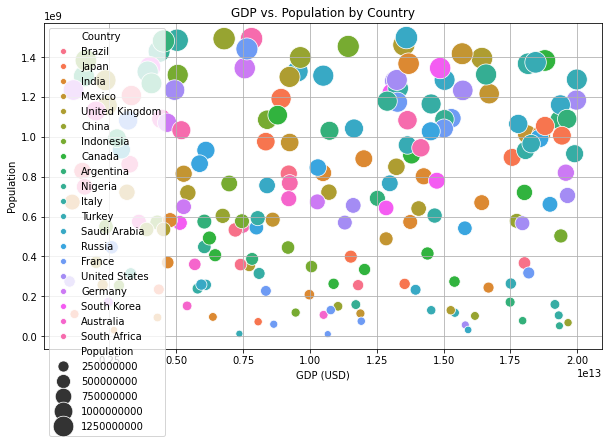

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='GDP (USD)', y='Population', hue='Country', size='Population', sizes=(50, 500))
plt.title('GDP vs. Population by Country')
plt.xlabel('GDP (USD)')
plt.ylabel('Population')
plt.legend()
plt.grid()
plt.show()

C:\Users\DELL NOTEBOOK\AppData\Local\Temp\ipykernel_14224\2511512436.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Country', y='Unemployment Rate (%)',palette='coolwarm')


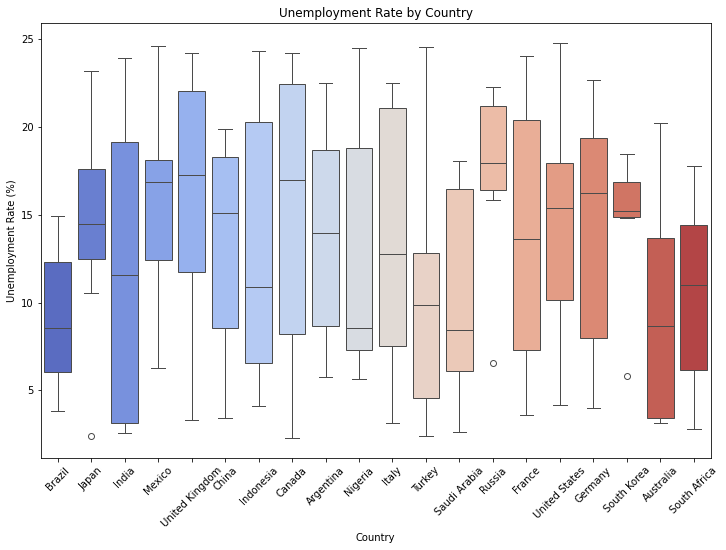

In [12]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x='Country', y='Unemployment Rate (%)',palette='coolwarm')
plt.title('Unemployment Rate by Country')
plt.xlabel('Country')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.show()

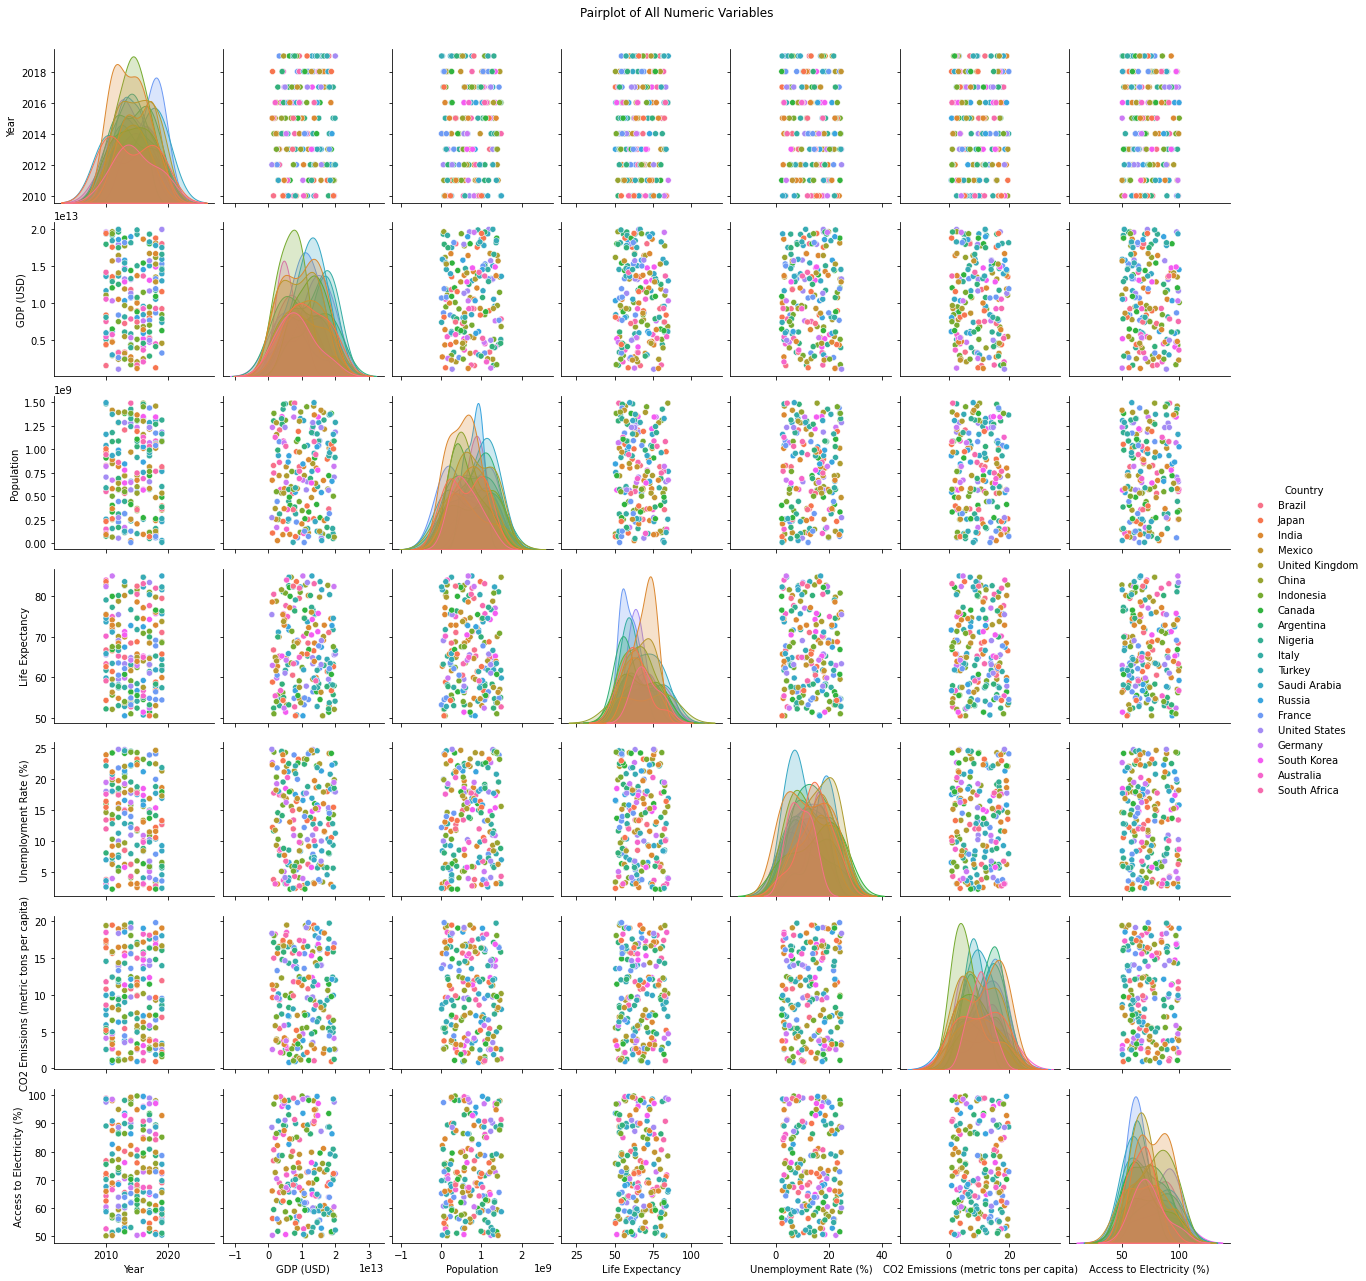

In [13]:
sns.pairplot(df, hue='Country', diag_kind='kde')
plt.suptitle('Pairplot of All Numeric Variables', y=1.02)
plt.show()

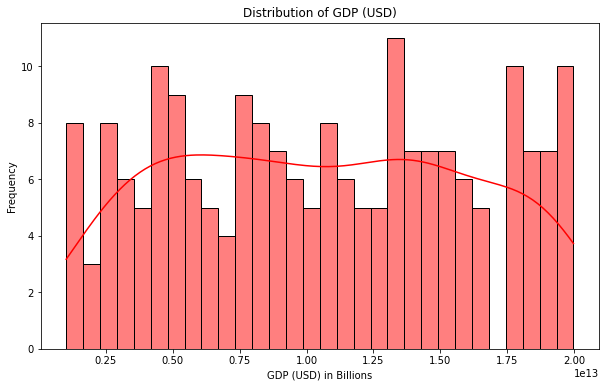

In [14]:
plt.figure(figsize=(10,6))
sns.histplot(df['GDP (USD)'], bins=30, kde=True, color='red')
plt.title('Distribution of GDP (USD)')
plt.xlabel('GDP (USD) in Billions')
plt.ylabel('Frequency')
plt.show()

C:\Users\DELL NOTEBOOK\AppData\Local\Temp\ipykernel_14224\748292036.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Year', y='GDP (USD)', hue='Country', ci=None)


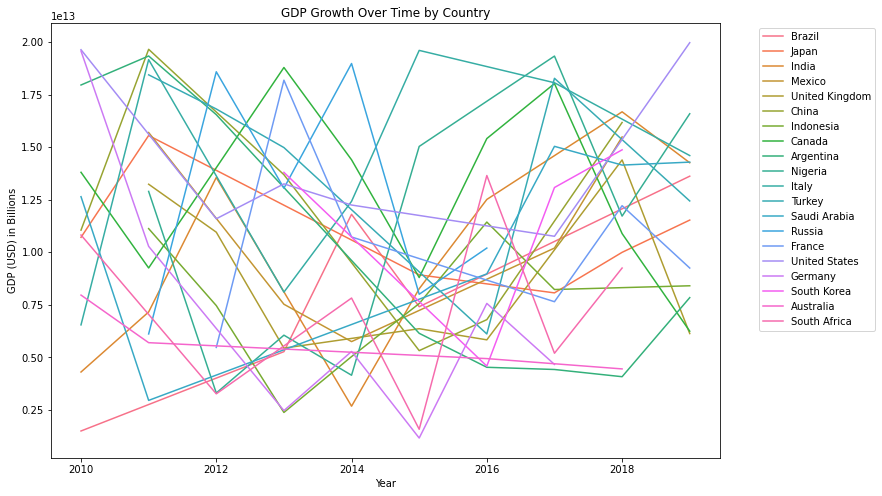

In [15]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df, x='Year', y='GDP (USD)', hue='Country', ci=None)
plt.title('GDP Growth Over Time by Country')
plt.xlabel('Year')
plt.ylabel('GDP (USD) in Billions')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

C:\Users\DELL NOTEBOOK\AppData\Local\Temp\ipykernel_14224\2727100840.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,data=df,palette='viridis')


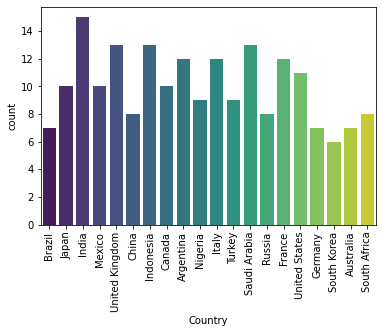

In [16]:
for col in df:
    if df[col].dtype == 'O':
        sns.countplot(x=col,data=df,palette='viridis')
        plt.xticks(rotation=90)
        plt.show()

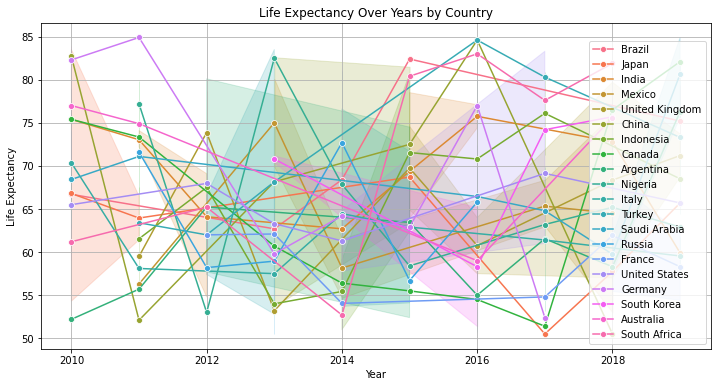

In [17]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='Life Expectancy', hue='Country', marker='o')
plt.title('Life Expectancy Over Years by Country')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.legend()
plt.grid()
plt.show()

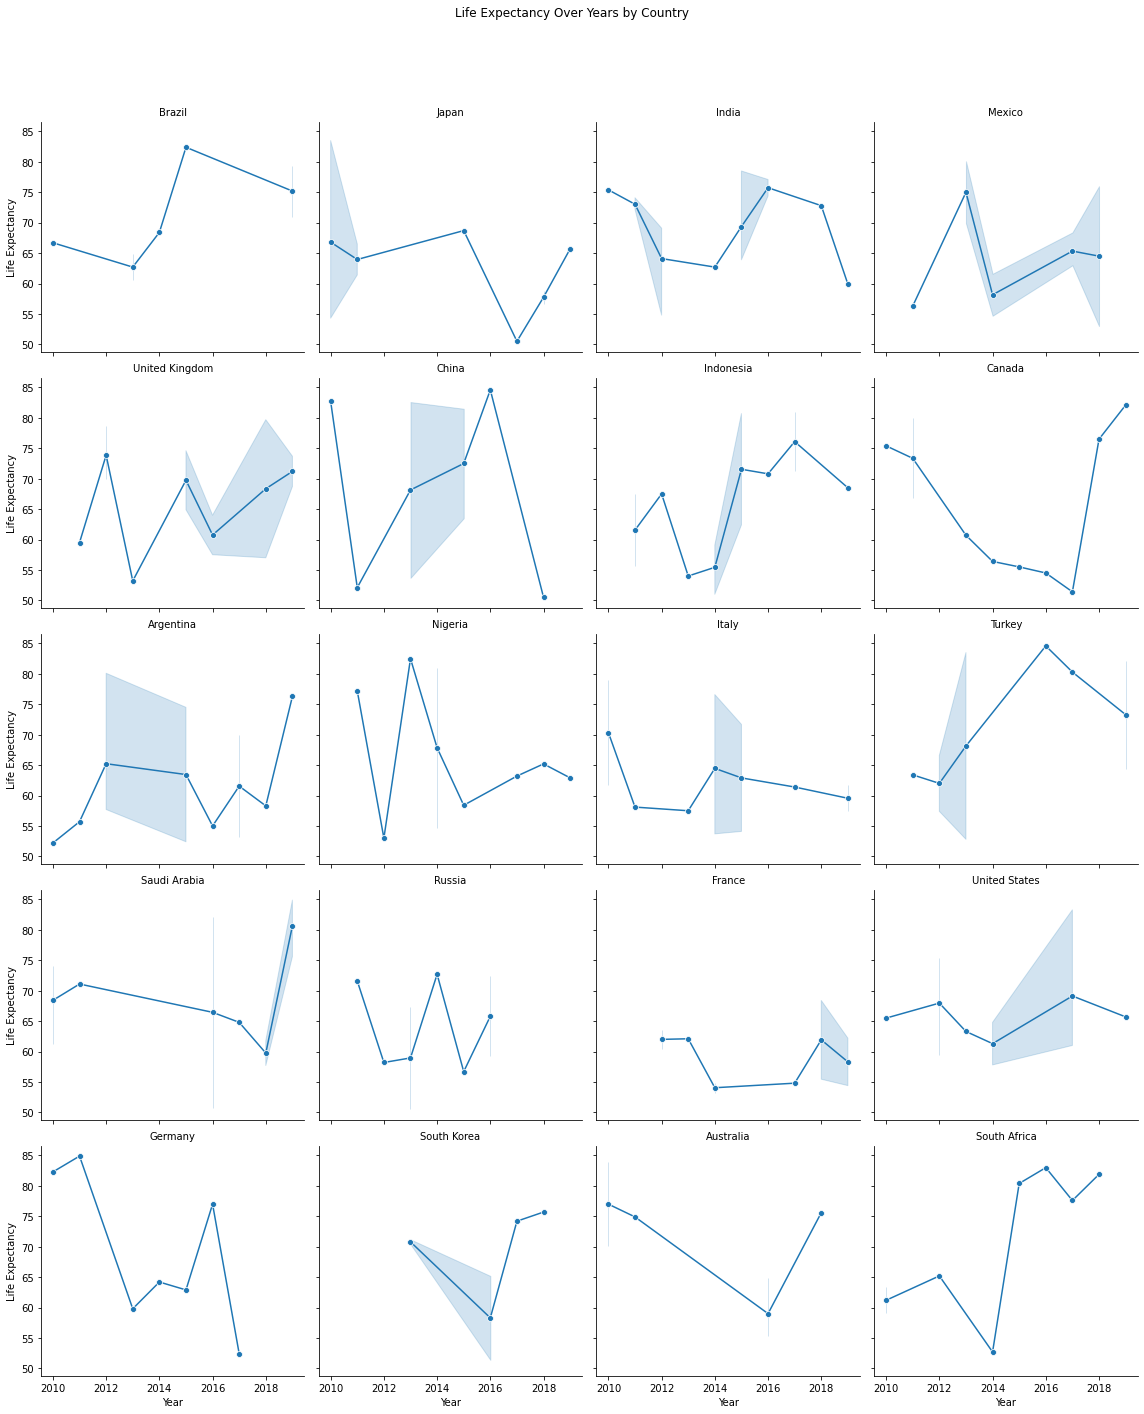

In [18]:
g = sns.FacetGrid(df, col='Country', col_wrap=4, height=4)
g.map(sns.lineplot, 'Year', 'Life Expectancy', marker='o')
g.set_titles(col_template='{col_name}')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Life Expectancy Over Years by Country')
plt.show()

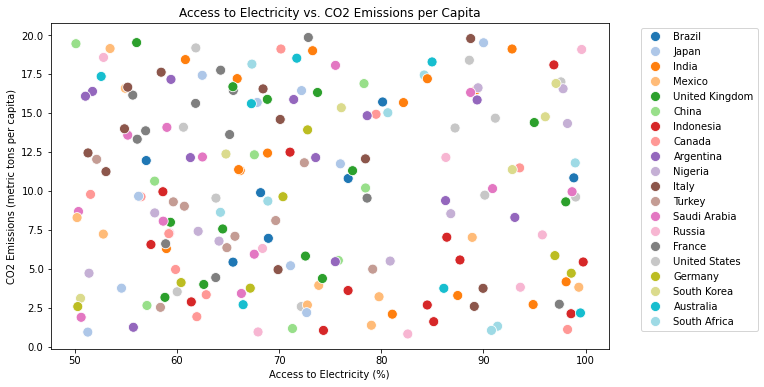

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Access to Electricity (%)', y='CO2 Emissions (metric tons per capita)', hue='Country', palette='tab20', s=100)
plt.title('Access to Electricity vs. CO2 Emissions per Capita')
plt.xlabel('Access to Electricity (%)')
plt.ylabel('CO2 Emissions (metric tons per capita)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()